# ***Data Importing***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!gdown --id 1xrKdZVKOHjOUfIEjOtKKFTKrTMHazuJk
!gdown --id 1cQK0aIFOuOlwyjBI2xNb4Y1H_CKfbli8

Downloading...
From: https://drive.google.com/uc?id=1xrKdZVKOHjOUfIEjOtKKFTKrTMHazuJk
To: /content/neighbourhoods.geojson
100% 403k/403k [00:00<00:00, 3.74MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cQK0aIFOuOlwyjBI2xNb4Y1H_CKfbli8
To: /content/listings.csv
100% 1.35M/1.35M [00:00<00:00, 8.25MB/s]


In [2]:
listings=pd.read_csv('listings.csv',
                   error_bad_lines=False)
listings.head(n=25)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79
5,6413,Gem of a Studio near Downtown,13879,Todd,NaN,78704,30.24829,-97.73726,Entire home/apt,99,30,115,2021-02-01,0.85,1,0
6,6448,"Secluded Studio @ Zilker - King Bed, Bright & ...",14156,Amy,NaN,78704,30.26027,-97.76503,Entire home/apt,139,3,235,2021-02-09,2.04,2,194
7,13035,Central East Austin house & garden,50793,Molly,NaN,78702,30.25919,-97.72871,Entire home/apt,500,2,12,2017-03-18,0.10,2,365
8,21126,Quiet Mid Century Modern Retreat with Patio an...,80406,Dani,NaN,78704,30.24417,-97.73988,Entire home/apt,190,1,113,2021-01-15,1.16,11,138
9,22166,Close in Hill country views NW,84906,Stacey,NaN,78759,30.38957,-97.76216,Entire home/apt,158,30,11,2021-01-10,0.08,1,308


In [3]:
pip install geojson

In [4]:
import geojson
with open('/content/neighbourhoods.geojson') as f:
    gj = geojson.load(f)
features = gj['features'][0]

In [5]:
print(features)

{"geometry": {"coordinates": [[[[-97.890016, 30.209412], [-97.889286, 30.208708], [-97.888672, 30.207904], [-97.88822, 30.207299], [-97.88752, 30.206345], [-97.886872, 30.205469], [-97.886517, 30.205022], [-97.886029, 30.204487], [-97.88542, 30.203912], [-97.884924, 30.203498], [-97.884474, 30.203157], [-97.884007, 30.202848], [-97.883473, 30.202527], [-97.88299, 30.202254], [-97.882506, 30.202013], [-97.881903, 30.201707], [-97.881386, 30.201494], [-97.880723, 30.201256], [-97.879919, 30.200993], [-97.879385, 30.200851], [-97.878781, 30.200713], [-97.878058, 30.200553], [-97.877606, 30.200478], [-97.876957, 30.200411], [-97.876312, 30.200365], [-97.87568, 30.200342], [-97.875091, 30.200326], [-97.874472, 30.200349], [-97.873762, 30.200394], [-97.873041, 30.200473], [-97.872354, 30.200575], [-97.871806, 30.200691], [-97.871298, 30.200814], [-97.870575, 30.200965], [-97.870402, 30.201], [-97.870068, 30.201057], [-97.869675, 30.20111], [-97.869287, 30.201144], [-97.868994, 30.201157], [-

# **Task1: Top Areas With Highest Number of Listings**
Neighbourhood_ID:	listings

1.	78745:	26733
2.	78751:	23334
3.	78758:	22029
4.	78735:	20357
5.	78702:	19429
6.	78701:	15938
7.	78704:	13740
8.	78729:	10191
9.	78754:	6326
10.	78717:	6299

In [6]:
high_num_of_listings={}
for i in listings['neighbourhood']:
  if i not in high_num_of_listings:
    high_num_of_listings[i]=0

In [7]:
for index ,item in enumerate(listings['calculated_host_listings_count']):
  if listings['neighbourhood'][index] in high_num_of_listings:
    high_num_of_listings[listings['neighbourhood'][index]]+=item
  

In [8]:
high_num_of_listings[78704]

13740

In [9]:
listings_per_neighbourhood=pd.DataFrame(high_num_of_listings.items(), columns=['Neighbourhood', 'listings'])

In [10]:
listings_per_neighbourhood.sort_values(by=['listings'], ascending=False,inplace=True)

In [11]:
listings_per_neighbourhood.head(n=10)

,Neighbourhood,listings
21,78745,26733
15,78751,23334
9,78758,22029
28,78735,20357
0,78702,19429
14,78701,15938
1,78704,13740
2,78729,10191
22,78754,6326
37,78717,6299


# **Task2: Thematic map of neighbourhood (broken down by single room and entire home**

In [12]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79


In [13]:
listings['room_type'].value_counts()

Entire home/apt    7962
Private room       2166
Shared room         133
Hotel room           11
Name: room_type, dtype: int64

In [14]:
!pip install descartes
!pip install geopandas


In [15]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


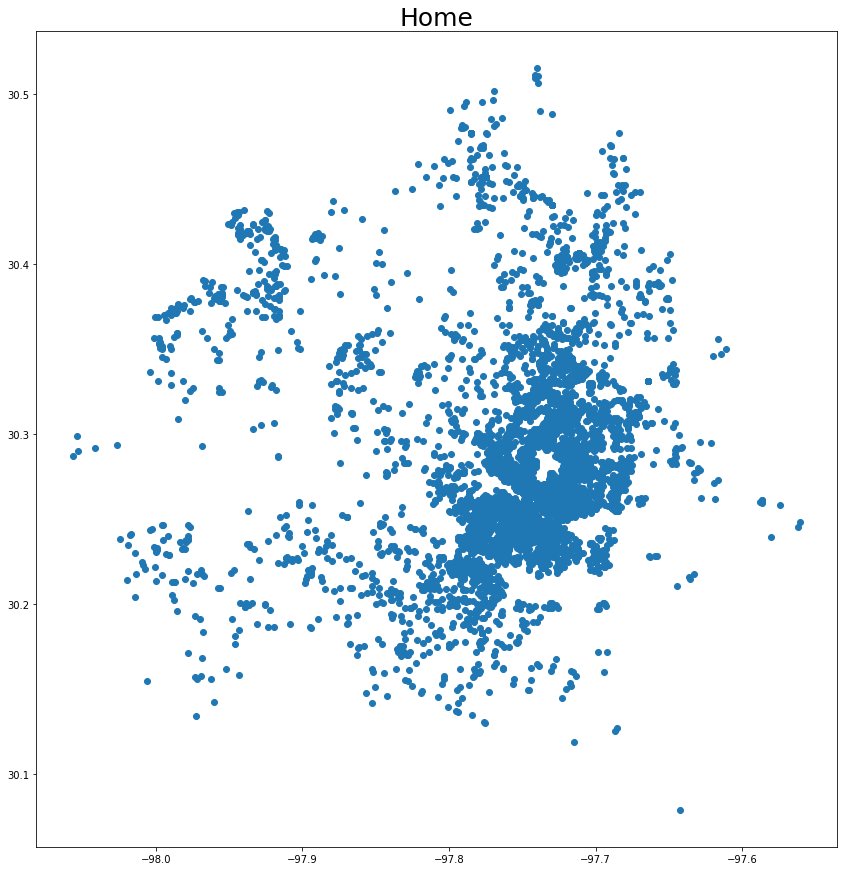

In [16]:
df_home=listings[listings['room_type']=='Entire home/apt']
geometry = [Point(xy) for xy in zip(df_home['longitude'], df_home['latitude'])]

crs = {'init': 'epsg:4326'}
entirehome = gpd.GeoDataFrame(df_home, crs=crs, geometry=geometry)
entirehome.plot(figsize=(15,15))
plt.title('Home',{'fontsize':25})
plt.show()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


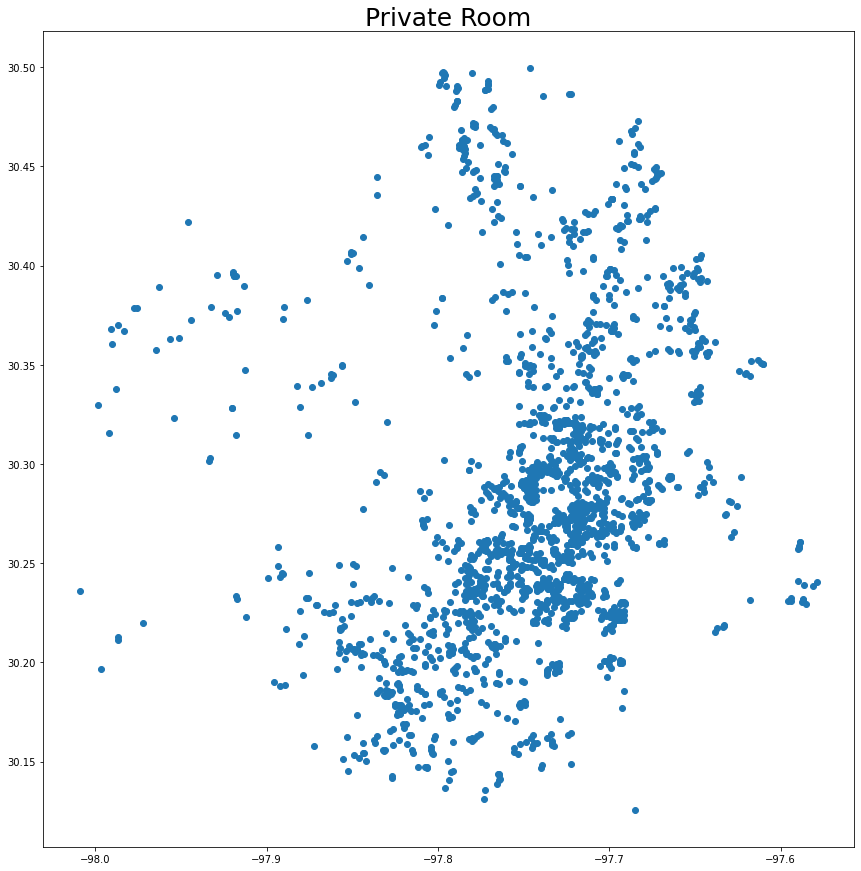

In [17]:
df_privateroom=listings[listings['room_type']=='Private room']
geometry = [Point(xy) for xy in zip(df_privateroom['longitude'], df_privateroom['latitude'])]

crs = {'init': 'epsg:4326'}
privateroom = gpd.GeoDataFrame(df_privateroom, crs=crs, geometry=geometry)
privateroom.plot(figsize=(15,15))
plt.title('Private Room',{'fontsize':25})
plt.show()

# **Task3: Top 10 hosts by total number of listing**

Name:	listings


1.   	Kia:	398
2.   	WanderJaunt:	131
3. 	TurnKey Vacation Rentals:	124
4. 	Martin:	101
5.	Michael:	98
6.	David:	76
7.	Sarah:	74
8.	Ryan:	67
9.	James:	62
10.	Renters Club:	56




In [18]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79


In [19]:
values = listings['host_name'].value_counts(dropna=False).keys().tolist()
counts = listings['host_name'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))

In [20]:
name=[]
total=[]
count=1
print("Top 10 hosts by their total number of listings:")
print('\n')
for key in value_dict.keys():
  print(count)
  print(key)
  print(value_dict[key])
  name.append(key)
  total.append(value_dict[key])
  print('\n')
  count+=1
  if count==11:
    break


Top 10 hosts by their total number of listings:


1
Kia
398


2
WanderJaunt
131


3
TurnKey Vacation Rentals
124


4
Martin
101


5
Michael
98


6
David
76


7
Sarah
74


8
Ryan
67


9
James
62


10
Renters Club
56




In [21]:
d = {'Name':name,'listings':total}
top10host = pd.DataFrame(d)
top10host.head(n=10)

,Name,listings
0,Kia,398
1,WanderJaunt,131
2,TurnKey Vacation Rentals,124
3,Martin,101
4,Michael,98
5,David,76
6,Sarah,74
7,Ryan,67
8,James,62
9,Renters Club,56


# ***Task4: One insight***

The Insight that I have chosen is finding the top 5 hosts who have the highest average price in each category on room_type.
The room type available are as follows:
1. Entire Home
2. Private Room
3. Shared Room
4. Hotel Room

The top 5 hosts who have the highest average price in Entire Home category:

Host_name  Average Price
1.	Eli	5150.0
2.	Andres	5070.0
3.	Ivan	5030.0
4.	Teresa & Rino	5000.0
5.	Redouane	4575.0

The top 5 hosts who have the highest average price in Private Room category:

Host_name	Average Price
1.	Arrive	10000.0
2.	Hai-Shan	9998.0
3.	Mason	1200.0
4.	Dasheanna	931.0
5.	Elijah	900.0

The top 5 hosts who have the highest average price in Shared Room category:

Host_name	Average Price
1.	Stacie	700.0
2.	Corey	400.0
3.	George	400.0
4.	Adam	387.5
5.  Daniel	350.0

The top 5 hosts who have the highest average price in Hotel Room category:

Host_name	Average Price
1.	The Wayback	2250.000000
2.	Ina	599.000000
3.	Locale	443.000000
4.	Bruce	210.000000
5.	Jennifer	198.333333

In [22]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,NaN,78702,30.27577,-97.71379,Private room,114,30,9,2018-03-14,0.06,3,0
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
4,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,39,1,259,2021-02-10,1.96,1,79


In [23]:
listings['room_type'].value_counts()

Entire home/apt    7962
Private room       2166
Shared room         133
Hotel room           11
Name: room_type, dtype: int64

In [24]:
df_home=listings[listings['room_type']=='Entire home/apt']
df_privateroom=listings[listings['room_type']=='Private room']
df_sharedroom=listings[listings['room_type']=='Shared room']
df_hotelroom=listings[listings['room_type']=='Hotel room']


In [25]:
df_home.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,NaN,78702,30.27750,-97.71398,Entire home/apt,200,7,24,2019-03-16,0.17,3,131
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.26112,-97.73448,Entire home/apt,104,2,543,2021-02-01,3.74,1,354
3,5636,"Soco, Barton Springs Private Guest Cottage",7148,Peggy,NaN,78704,30.24630,-97.76361,Entire home/apt,46,30,21,2020-11-06,0.15,2,67
5,6413,Gem of a Studio near Downtown,13879,Todd,NaN,78704,30.24829,-97.73726,Entire home/apt,99,30,115,2021-02-01,0.85,1,0
6,6448,"Secluded Studio @ Zilker - King Bed, Bright & ...",14156,Amy,NaN,78704,30.26027,-97.76503,Entire home/apt,139,3,235,2021-02-09,2.04,2,194


In [26]:
hostname = df_home['host_name'].value_counts(dropna=False).keys().tolist()
hostcount = df_home['host_name'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))

home={}
for i in value_dict.keys():
  
  df_temp=df_home[df_home['host_name']==i]
  df_temp.head()
  
  mean_price=df_temp['price'].mean()
  if str(mean_price)=='nan':
    continue
  home[i]=mean_price
  #print(mean_price)
home_df=pd.DataFrame(home.items(), columns=['Host_name', 'Average Price'])
home_df.sort_values(by=['Average Price'], ascending=False,inplace=True)
home_df.head()

,Host_name,Average Price
922,Eli,5150.0
550,Andres,5070.0
985,Ivan,5030.0
1569,Teresa & Rino,5000.0
2085,Redouane,4575.0


In [27]:
hostname = df_privateroom['host_name'].value_counts(dropna=False).keys().tolist()
hostcount = df_privateroom['host_name'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))

privateroom={}
for i in value_dict.keys():
  
  df_temp=df_privateroom[df_privateroom['host_name']==i]
  df_temp.head()
  
  mean_price=df_temp['price'].mean()
  if str(mean_price)=='nan':
    continue
  privateroom[i]=mean_price
  #print(mean_price)
privateroom_df=pd.DataFrame(privateroom.items(), columns=['Host_name', 'Average Price'])
privateroom_df.sort_values(by=['Average Price'], ascending=False,inplace=True)
privateroom_df.head()

,Host_name,Average Price
801,Arrive,10000.0
995,Hai-Shan,9998.0
624,Mason,1200.0
932,Dasheanna,931.0
548,Elijah,900.0


In [28]:
hostname = df_sharedroom['host_name'].value_counts(dropna=False).keys().tolist()
hostcount = df_sharedroom['host_name'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))

sharedroom={}
for i in value_dict.keys():
  
  df_temp=df_sharedroom[df_sharedroom['host_name']==i]
  df_temp.head()
  
  mean_price=df_temp['price'].mean()
  if str(mean_price)=='nan':
    continue
  sharedroom[i]=mean_price
  #print(mean_price)
sharedroom_df=pd.DataFrame(sharedroom.items(), columns=['Host_name', 'Average Price'])
sharedroom_df.sort_values(by=['Average Price'], ascending=False,inplace=True)
sharedroom_df.head()

,Host_name,Average Price
55,Stacie,700.0
35,George,400.0
49,Corey,400.0
3,Adam,387.5
1,Daniel,350.0


In [29]:
hostname = df_hotelroom['host_name'].value_counts(dropna=False).keys().tolist()
hostcount = df_hotelroom['host_name'].value_counts(dropna=False).tolist()
value_dict = dict(zip(values, counts))

hotel={}
for i in value_dict.keys():
  
  df_temp=df_hotelroom[df_hotelroom['host_name']==i]
  df_temp.head()
  
  mean_price=df_temp['price'].mean()
  if str(mean_price)=='nan':
    continue
  hotel[i]=mean_price
  #print(mean_price)
hotel_df=pd.DataFrame(hotel.items(), columns=['Host_name', 'Average Price'])
hotel_df.sort_values(by=['Average Price'], ascending=False,inplace=True)
hotel_df.head()

,Host_name,Average Price
2,The Wayback,2250.000000
7,Ina,599.000000
3,Locale,443.000000
4,Bruce,210.000000
1,Jennifer,198.333333
